In [38]:
#dataset of images  of famous politicians around the world
#can classify
from sklearn import datasets
import  matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble
import time

In [3]:
lfw=datasets.fetch_lfw_people(min_faces_per_person=100,resize=0.4)

In [4]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [5]:
lfw.data.shape 

(1140, 1850)

In [7]:
lfw.images.shape #rectangular images

(1140, 50, 37)

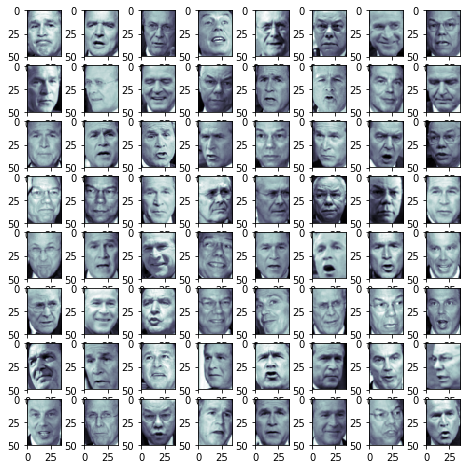

In [10]:
fig=plt.figure(figsize=(8,8)) # 8X8 space created
for i in range(64):
    ax=fig.add_subplot(8,8,i+1) # no of parameters-rows,now of cols, position (starting from 1)
    ax.imshow(lfw.images[i],cmap=plt.cm.bone)
plt.show()

In [41]:
x,y=lfw.data,lfw.target
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
pca=PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
#finding optimum value of features needed
k=0
total=sum(pca.explained_variance_)
current_sum=0
while current_sum/total < 0.99:
    current_sum+=pca.explained_variance_[k]
    k+=1
print(k) # only 123 features needed out  of 4096 for keeping 95 percent of total information

316


In [30]:
pca_lfw=PCA(n_components=k,whiten=True)
x_transformed=pca_lfw.fit_transform(x_train)
x_transformed.shape

(855, 316)

In [31]:
x_approx=pca_lfw.inverse_transform (x_transformed)
x_approx=x_approx.reshape((855,50,37))

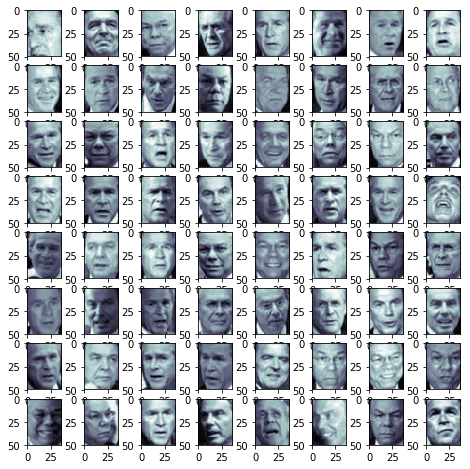

In [32]:
fig=plt.figure(figsize=(8,8)) # 8X8 space created
for i in range(64):
    ax=fig.add_subplot(8,8,i+1) 
    ax.imshow(x_approx[i],cmap=plt.cm.bone)
plt.show()

In [33]:
#images still look intact same as originally
eigenv=pca_lfw.components_
eigenv.shape


(316, 1850)

In [34]:
eigenfaces=eigenv.reshape((316,50,37))

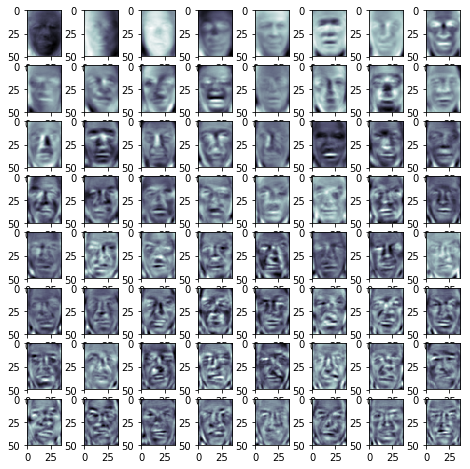

In [35]:
fig=plt.figure(figsize=(8,8)) # 8X8 space created

for i in range(64):
    ax=fig.add_subplot(8,8,i+1) # no of parameters-rows,now of cols, position (starting from 1)
    ax.imshow(eigenfaces[i],cmap=plt.cm.bone)
plt.show()

CLASSFICATION using Random Forests

In [37]:
x_train_pca=x_transformed
x_test_pca=pca_lfw.transform(x_test)

In [44]:
#WITHOUT APPLYING PCA
rf=ensemble.RandomForestClassifier()
start=time.time()
rf.fit(x_train,y_train)
print(time.time()-start)
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.21741604804992676
             precision    recall  f1-score   support

          0       0.68      0.67      0.68        61
          1       0.42      0.22      0.29        36
          2       0.62      0.96      0.75       122
          3       0.71      0.16      0.26        31
          4       0.70      0.20      0.31        35

avg / total       0.63      0.62      0.57       285

[[ 41   4  16   0   0]
 [ 10   8  17   0   1]
 [  2   1 117   0   2]
 [  4   2  20   5   0]
 [  3   4  19   2   7]]


class 2 is having lots of images i.e 122 and sese in confusion matrix, we are lot of biased towards class 2 (George W Bush ) coz they are lot more frequent

In [46]:
#WITH APPLYING PCA
rf=ensemble.RandomForestClassifier()
start=time.time()
rf.fit(x_train_pca,y_train)
print(time.time()-start)
y_pred=rf.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.1246647834777832
             precision    recall  f1-score   support

          0       0.48      0.36      0.41        61
          1       0.43      0.08      0.14        36
          2       0.51      0.93      0.66       122
          3       0.25      0.03      0.06        31
          4       0.57      0.11      0.19        35

avg / total       0.47      0.50      0.42       285

[[ 22   1  36   1   1]
 [  8   3  23   1   1]
 [  7   2 113   0   0]
 [  5   0  24   1   1]
 [  4   1  25   1   4]]


Speed improved
Accuracy reduced